In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
data = pd.read_csv('results.csv', sep='\t', header=None)
data.columns = ['model', 'vertices', 'edges', 'layers', 'features', 'cscmm_new', 'backward_new', 'cscmm_old', 'backward_old']
data['ratio_old'] = data['cscmm_old'] / data['backward_old']
data['ratio_new'] = data['cscmm_new'] / data['backward_new']
data['other_new'] = data['backward_new'] - data['cscmm_new']
data['other_old'] = data['backward_old'] - data['cscmm_old']
data['density'] = data['edges'] / (data['vertices'] * data['vertices'])
# pd.set_option('display.max_rows', None)
data.sort_values(by=['model', 'features'], inplace=True)
data

,model,vertices,edges,layers,features,cscmm_new,backward_new,cscmm_old,backward_old,ratio_old,ratio_new,other_new,other_old,density
16,AGNN,131072,1717987,2,16,0.029324,0.079667,0.032476,0.082357,0.394332,0.368082,0.050343,0.049881,0.0001
18,AGNN,131072,17179869,2,16,0.101885,0.239226,0.113269,0.249749,0.453532,0.425894,0.137341,0.136480,0.0010
20,AGNN,262144,6871948,2,16,0.082500,0.217151,0.117656,0.252688,0.465616,0.379918,0.134652,0.135032,0.0001
22,AGNN,262144,68719477,2,16,0.381187,0.848144,0.548114,1.014953,0.540039,0.449436,0.466958,0.466839,0.0010
17,AGNN,131072,1717987,2,128,0.180104,0.520904,0.226972,0.567752,0.399772,0.345754,0.340800,0.340780,0.0001
19,AGNN,131072,17179869,2,128,0.280216,0.732351,0.516009,0.968412,0.532840,0.382625,0.452135,0.452403,0.0010
21,AGNN,262144,6871948,2,128,0.421256,1.146089,0.740244,1.470119,0.503526,0.367560,0.724832,0.729875,0.0001
23,AGNN,262144,68719477,2,128,1.009651,2.265730,2.830154,4.085104,0.692798,0.445618,1.256079,1.254950,0.0010
8,GAT,131072,1717987,2,16,0.012849,0.057481,0.014018,0.059616,0.235132,0.223530,0.044632,0.045599,0.0001
10,GAT,131072,17179869,2,16,0.046145,0.157908,0.049471,0.161029,0.307221,0.292227,0.111763,0.111557,0.0010


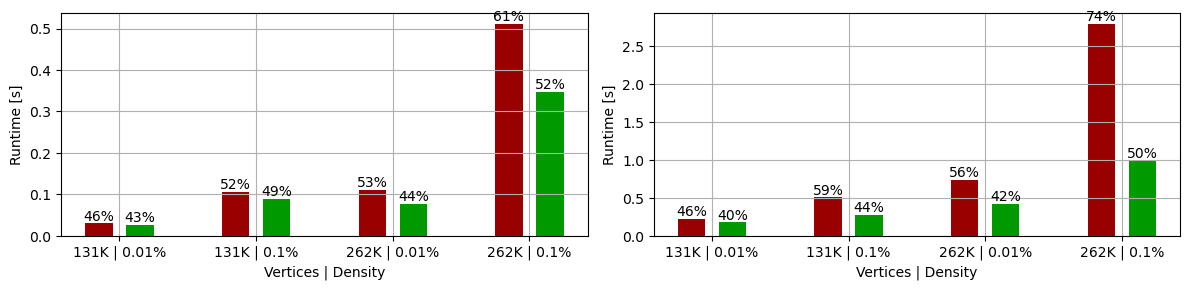

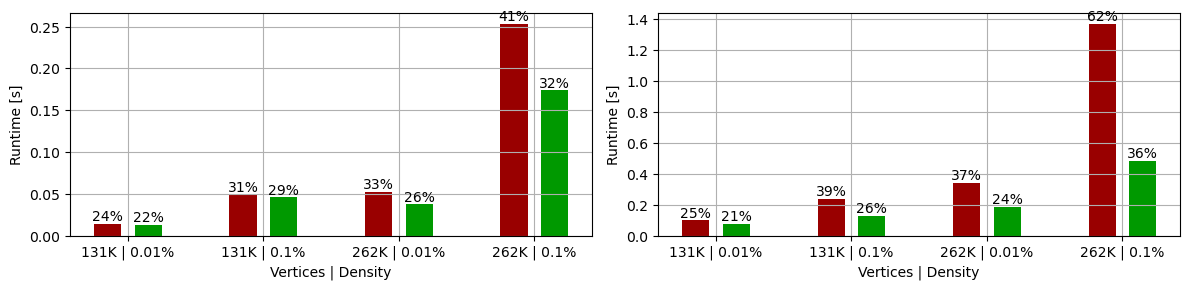

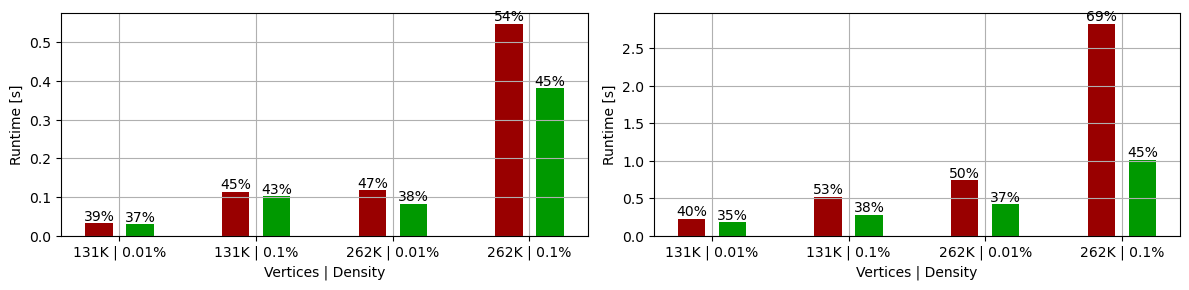

In [13]:
labels = ['131K | 0.01%', '131K | 0.1%', '262K | 0.01%', '262K | 0.1%']
x = np.arange(4) * 4
width = 0.8
offset = 0.6 
red = "#990000"
green = "#009900"
black = "#000000"
darkgrey = "#666666"

for model in ['VA', 'GAT', 'AGNN']:
    fig, ax = plt.subplots(1, 2, figsize=(12, 3))
    for ax, feats in zip(ax, [16, 128]):
        current_sample = data[(data['model'] == model) & (data['features'] == feats)]
        # ax.bar(x - offset, current_sample['other_old'], width=width, color=darkgrey)
        # p1 = ax.bar(x - offset, current_sample['cscmm_old'], width=width, bottom=current_sample['other_old'], color=red)
        p1 = ax.bar(x - offset, current_sample['cscmm_old'], width=width, color=red)
        ax.bar_label(p1, current_sample['ratio_old'].map(lambda x: f'{x * 100:.0f}%'), label_type='edge')
        # ax.bar(x + offset, current_sample['other_new'], width=width, color=darkgrey)
        # p2 = ax.bar(x + offset, current_sample['cscmm_new'], width=width, bottom=current_sample['other_new'], color=green)
        p2 = ax.bar(x + offset, current_sample['cscmm_new'], width=width, color=green)
        ax.bar_label(p2, current_sample['ratio_new'].map(lambda x: f'{x * 100:.0f}%'), label_type='edge')
        ax.grid(which = "major")
        ax.grid(which = "minor", linewidth = 0.2)
        # Set x tick positions and labels
        ax.set_xticks(x)

        ax.set_xticklabels(labels)

        ax.set_xlabel("Vertices | Density")
        ax.set_ylabel("Runtime [s]")

    # Display the plot
    plt.tight_layout()
    plt.savefig(f'cscmm_{model}.pdf')



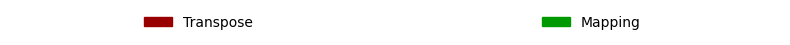

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Manually define the labels and colors for the legends
legend_labels = ['Transpose', 'Mapping']
legend_colors = ["#990000", "#009900"]

# Create the custom legend handles
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Create a figure with multiple axes for legends
fig, axes = plt.subplots(1, 2, figsize=(8, 0.5))

# Iterate over the axes and add legends
for ax, handle in zip(axes, legend_handles):
    ax.axis('off')  # Remove axes and ticks
    ax.legend(handles=[handle], frameon=False, loc='center')

# Show the figure
plt.tight_layout()
plt.savefig('legend.pdf')